In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
from sklearn import preprocessing # for encoding
# from sklearn.metrics import 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
od.download("https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sumitk87549


Your Kaggle Key:

  ········


100%|██████████| 4.63k/4.63k [00:00<00:00, 861kB/s]

In [5]:
df_raw = pd.read_csv("housing-price-prediction/Housing.csv",encoding="ISO-8859-1")
df_raw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df_raw.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [10]:
encoder = preprocessing.LabelEncoder()
df_raw[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']] = df_raw[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']].apply(encoder.fit_transform)

In [11]:
df_raw.head(7)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1


In [14]:
npx = df_raw.drop(columns=['price'],inplace=False).values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(npx, df_raw.price, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(436, 12) (109, 12) (436,) (109,)


In [28]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor()

In [29]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [30]:
regtree.score(x_test, y_test) # R squared score

0.14060057278488247

In [31]:
pred = regtree.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

2556839893325.688

In [32]:
import sklearn.tree as tree


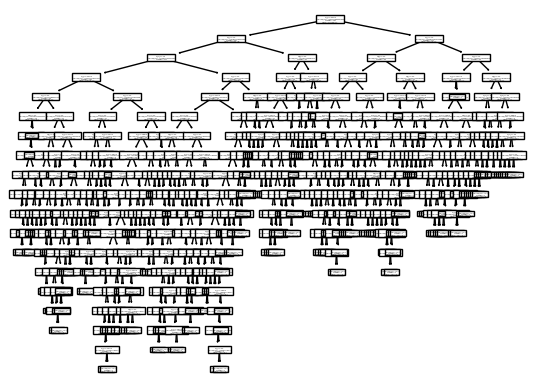

In [33]:
tree.plot_tree(regtree)
plt.show()

In [34]:
print("$",(pred - y_test).abs().mean()*1000)

$ 1123342660.550459
